In [40]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
import pickle
from sklearn import metrics

In [4]:
df=pd.read_csv(r"C:\Users\Suyash Tambe\Desktop\PDS\PEM_Cell.csv")
df

,anode outlet pressure 1,anode outlet pressure 2,cathode outlet pressure 1,cathode outlet pressure 2,current,anode reactant flow,anode inlet pressure 1,anode inlet pressure 2,cathode air inlet flow,cathode inlet pressure 1,...,cathode outlet temperature 2,cathode inlet temperature 2,cathode outlet temperature 1,cathode inlet temperature 1,primary water inlet pressure 2,primary water inlet pressure 1,primary water inlet flow 2,primary water inlet flow 1,water inlet temperature,flag
0,0,0,700,700,106,283,1792,1788,1684,1252,...,74,46,75,47,2040,2008,814,816,29,0
1,0,0,700,700,106,283,1792,1788,1680,1252,...,75,46,75,46,2036,2004,814,812,30,0
2,0,0,700,700,106,283,1792,1788,1676,1252,...,75,46,75,46,2044,2004,816,816,30,0
3,0,0,700,700,106,283,1792,1792,1688,1252,...,74,46,75,46,2048,2012,814,818,29,0
4,0,0,700,700,0,0,980,992,8,1008,...,39,48,39,47,992,1004,0,0,33,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7695,0,0,700,700,106,283,1792,1788,1680,1248,...,74,46,75,46,2040,2004,814,808,29,0
7696,0,0,700,700,106,283,1792,1788,1672,1252,...,75,46,75,46,2036,2004,816,818,30,0
7697,0,0,700,700,0,0,1020,1024,48,1008,...,25,50,27,48,1004,1012,0,0,33,1
7698,0,0,700,700,106,283,1792,1788,1680,1248,...,74,46,75,46,2044,2012,814,814,29,0


Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-score: 1.0
Confusion Matrix:
[[977   0]
 [  0 563]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       977
           1       1.00      1.00      1.00       563

    accuracy                           1.00      1540
   macro avg       1.00      1.00      1.00      1540
weighted avg       1.00      1.00      1.00      1540



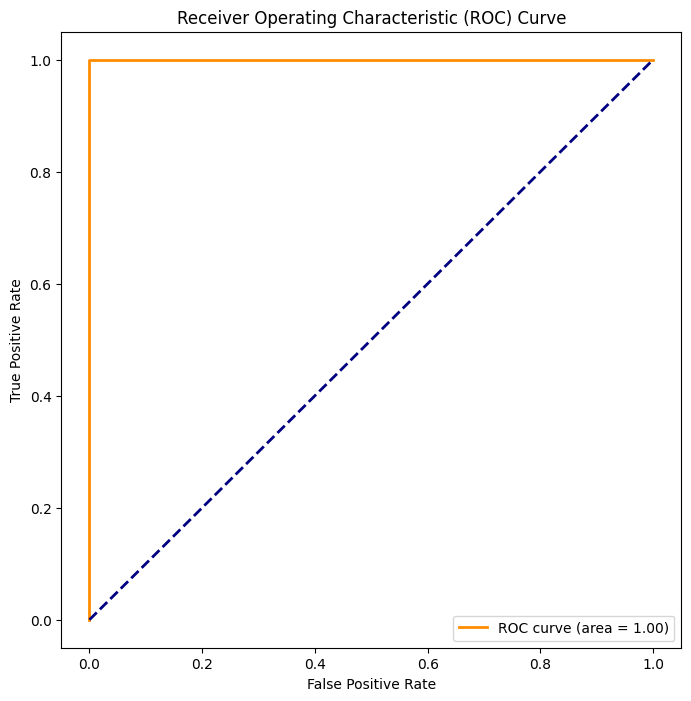

In [7]:
import pickle
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc

# Load the data
df = pd.read_csv(r"C:\Users\Suyash Tambe\Desktop\PDS\PEM_Cell.csv")

# Selecting features and target
features = df[[" current","primary water inlet pressure 1", "primary water inlet pressure 2"]]
target = df['flag']

# Split the data into training and testing sets
features_train, features_test, target_train, target_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Initializing and training the Naive Bayes model
model = GaussianNB()
model.fit(features_train, target_train)

# Make predictions on the test set
target_pred = model.predict(features_test)

# Evaluate the model
accuracy = metrics.accuracy_score(target_test, target_pred)
precision = metrics.precision_score(target_test, target_pred)
recall = metrics.recall_score(target_test, target_pred)
f1_score = metrics.f1_score(target_test, target_pred)

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1-score: {f1_score}')

# Confusion Matrix
conf_matrix = confusion_matrix(target_test, target_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Classification Report
class_report = classification_report(target_test, target_pred)
print("Classification Report:")
print(class_report)

# ROC Curve and AUC
fpr, tpr, thresholds = roc_curve(target_test, target_pred)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()
